In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df = pd.read_csv(r'/content/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.info()
df.duplicated().sum()
hd = df.drop_duplicates()
hd
hd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<ipython-input-7-a2b5155c58ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hd.corr(), annot = True, cmap = 'Blues')


<Axes: >

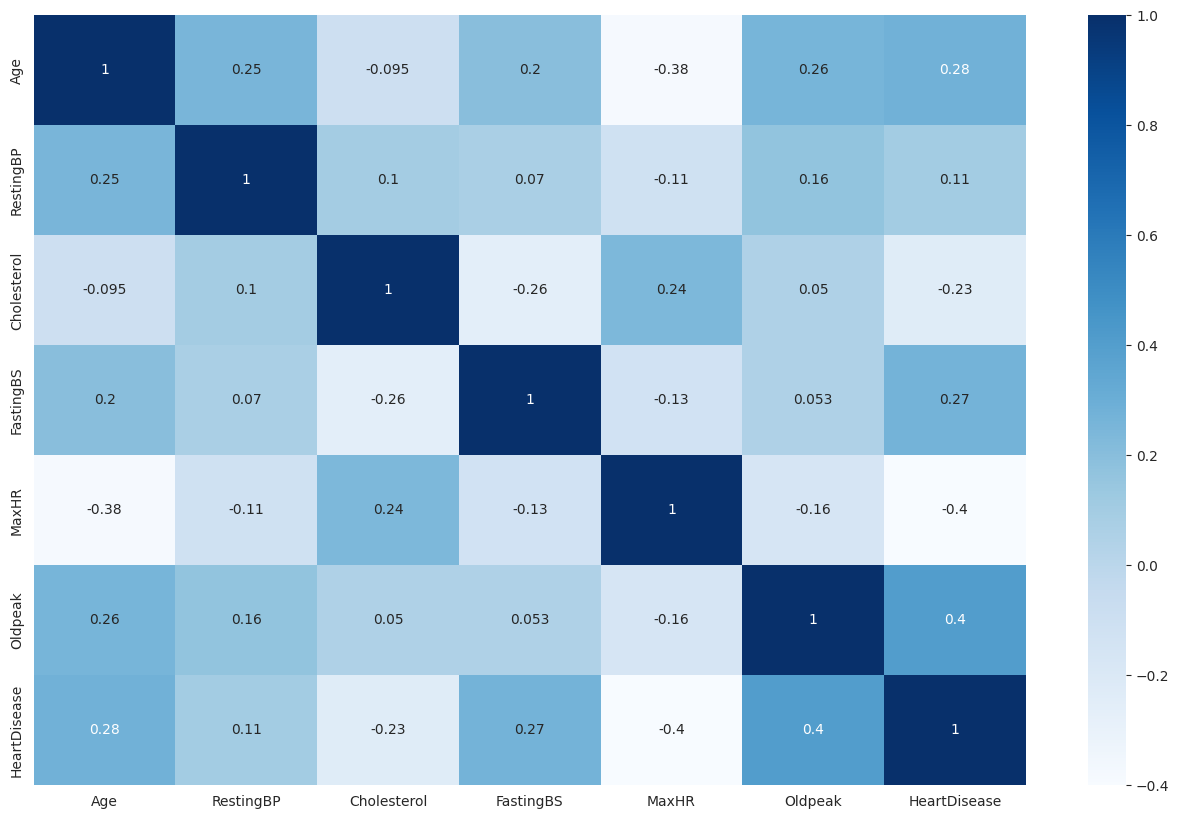

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(hd.corr(), annot = True, cmap = 'Blues')

In [ ]:
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

Age: 50
Sex: 2
ChestPainType: 4
RestingBP: 67
Cholesterol: 222
FastingBS: 2
RestingECG: 3
MaxHR: 119
ExerciseAngina: 2
Oldpeak: 53
ST_Slope: 3
HeartDisease: 2


* Age: idade
* Sex: sexo (female, male)
* ChestPainType: Tipo de dor no peito. Angina = 
A angina é uma forte dor torácica causada pela falta de oxigênio no coração. Na maioria das vezes é acompanhada de uma sensação de aperto e queimação, que pode se espalhar para os braços, costas e pescoço. (TA: Angina Tipica, ATA: Angina Atipica, NAP: Sem dor angina, ASY: Assintomatico)
* RestingBP: pressão arterial em repouso (mm/Hg)
* Cholesterol: Colesterol Sérico (mm/dl)
* FastingBS: Glicose em jejum (1: if FastingBS > 120 mg/dl, 0: otherwise)
* RestingECG: Resultado do eletrocardiograma em repouso (
* Normal: Normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes)
* MaxHR: frequência cardíaca máxima alcançada (Valor numérico entre 60 e 202)
* ExerciseAngina: Fazendo exercicio, sente dor no peito? (Y: Yes, N: No)
* Oldpeak: TIRAR
* ST_Slope: TIRAR
* HeartDisease: 1: heart disease, 0: Normal

In [ ]:
categoricas = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina']
numericas = ['Age','RestingBP','Cholesterol','MaxHR']

# Removendo Outliers

<Axes: >

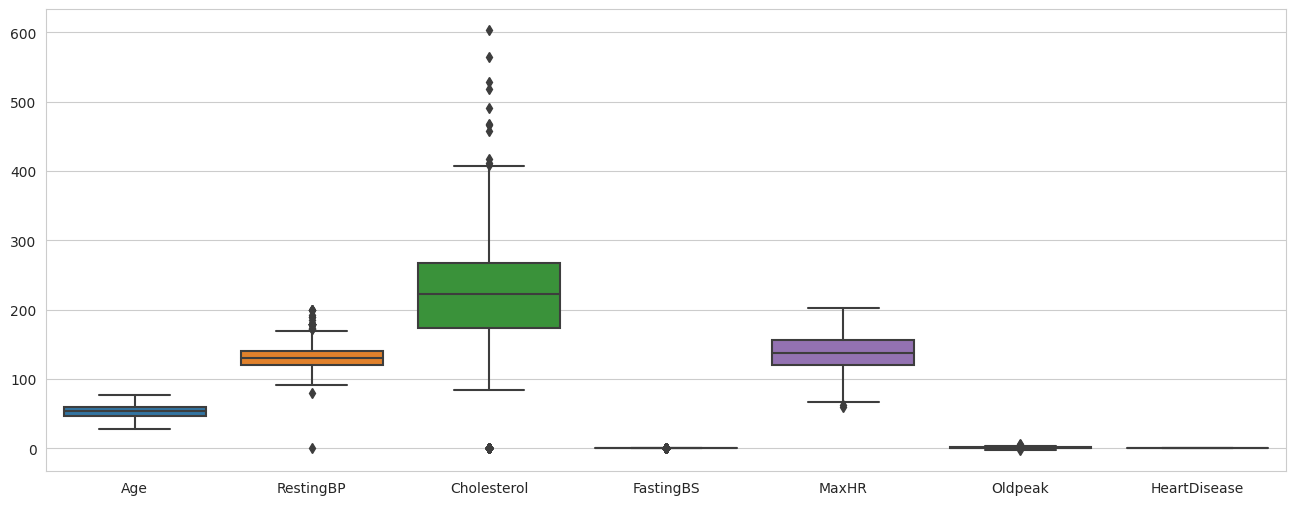

In [ ]:
plt.figure(figsize = (16,6))
sns.boxplot(data= hd)

In [ ]:
hd.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
hd['RestingBP'].quantile(0.99)

180.0

<Axes: >

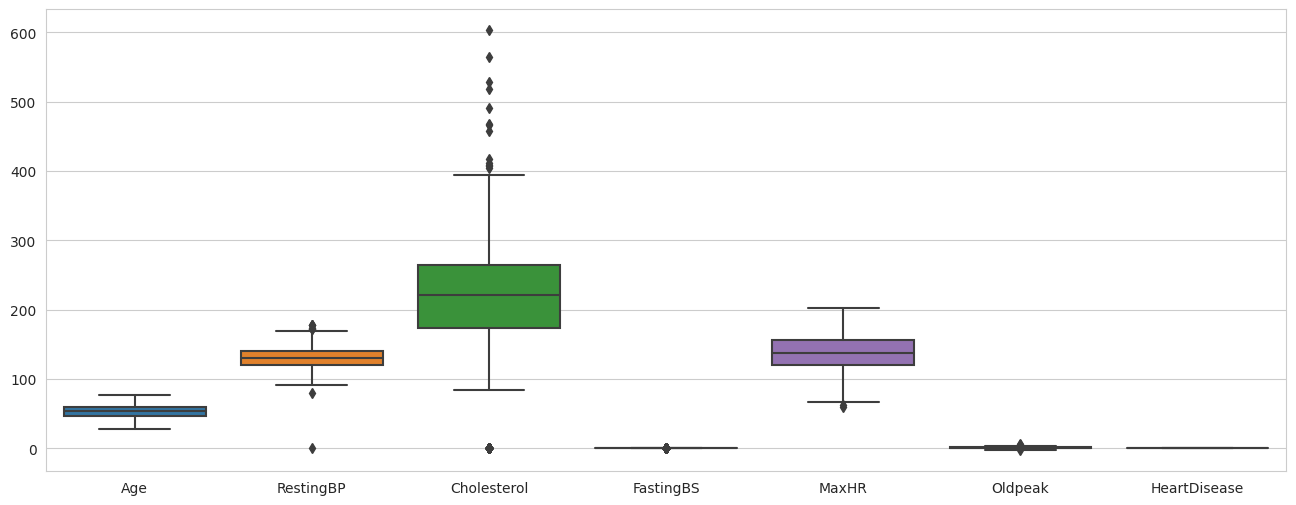

In [ ]:
hd1 = hd[hd['RestingBP'] < hd['RestingBP'].quantile(0.99)]
plt.figure(figsize = (16,6))
sns.boxplot(data= hd1)

<Axes: >

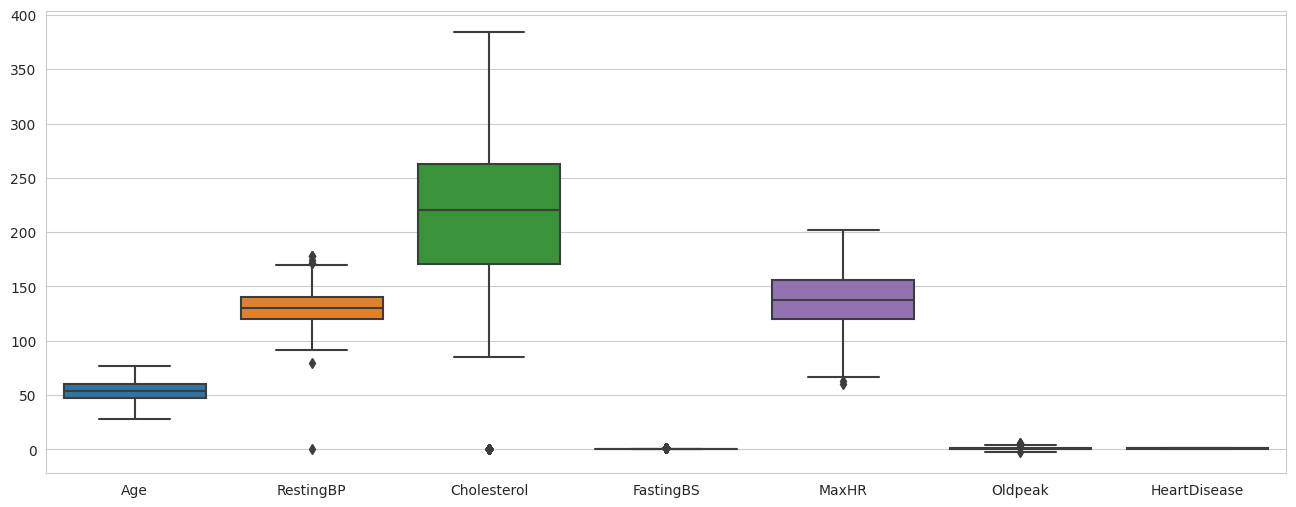

In [ ]:
hd2 = hd1[hd1['Cholesterol'] < hd1['Cholesterol'].quantile(0.98)]
plt.figure(figsize = (16,6))
sns.boxplot(data= hd2)

In [ ]:
hd2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,53.457955,131.103409,193.270455,0.230682,136.923864,0.880341,0.551136
std,9.477021,16.885736,103.319631,0.421509,25.448020,1.064747,0.497661
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,171.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,220.500000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,263.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,178.000000,384.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
hd2 = hd.drop(['Oldpeak','ST_Slope'], axis=1)

In [ ]:
categoricas = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina']
numericas = ['Age','RestingBP','Cholesterol','MaxHR']

In [ ]:
hd4 = pd.get_dummies(hd2, columns = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina'])
hd4

,Age,RestingBP,Cholesterol,MaxHR,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,172,0,0,1,0,1,0,0,1,0,0,1,0,1,0
1,49,160,180,156,1,1,0,0,0,1,0,1,0,0,1,0,1,0
2,37,130,283,98,0,0,1,0,1,0,0,1,0,0,0,1,1,0
3,48,138,214,108,1,1,0,1,0,0,0,1,0,0,1,0,0,1
4,54,150,195,122,0,0,1,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1,0,1,0,0,0,1,1,0,0,1,0,1,0
914,68,144,193,141,1,0,1,1,0,0,0,0,1,0,1,0,1,0
915,57,130,131,115,1,0,1,1,0,0,0,1,0,0,1,0,0,1
916,57,130,236,174,1,1,0,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
import pickle

def relatorio_ml(df, algoritmo, opt = 2):
    X = df.drop('HeartDisease', axis = 1)
    y = df['HeartDisease']
    
    X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42)
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
    
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)

    pkl_filename = "random_forest_model.pkl"

    with open(pkl_filename, 'wb') as file:
      pickle.dump(ml, file)


    print(f"Acurácia do treino: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acurácia do teste: {score_test * 100:.2f}%")
    
    
    return score_train, score_test

In [ ]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt = 0)
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)
ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier)
kn_train, kn_test = relatorio_ml(hd4, KNeighborsClassifier)
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

Acurácia do treino: 82.56%
Acurácia do teste: 78.80%
Acurácia do treino: 100.00%
Acurácia do teste: 72.28%
Acurácia do treino: 83.79%
Acurácia do teste: 78.26%
Acurácia do treino: 79.29%
Acurácia do teste: 70.11%
Acurácia do treino: 100.00%
Acurácia do teste: 79.35%


In [ ]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest', 'Ada Boost'],
       'Acurácia Treino': [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train * 100, 2),
                          round(rand_train * 100, 2), round(ada_train * 100, 2)],
       'Acurácia Test': [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test * 100, 2),
                        round(rand_test * 100, 2), round(ada_test * 100, 2)]}
df = pd.DataFrame(data)
df.sort_values(by='Acurácia Test', ascending = False, inplace = True)
df

,Models,Acurácia Treino,Acurácia Test
0,Logistic Regression,82.56,78.80
3,Random Forest,100.00,78.80
4,Ada Boost,83.79,78.26
1,Decision Tree,100.00,73.37
2,KNeighbors,79.29,70.11


In [ ]:
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

Acurácia do treino: 100.00%
Acurácia do teste: 78.80%
